<a href="https://colab.research.google.com/github/WarMachineRock/Data_Visualitation/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Specify the directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/data/cassava-leaf-disease-dataset'

# Check if the CSV file exists
csv_path = os.path.join(data_dir, 'labels.csv')
if not os.path.exists(csv_path):
    print("Error: labels.csv file not found.")
else:
    # Load the DataFrame with image filenames and class labels
    df = pd.read_csv(csv_path)

    # Load and preprocess images for CNN
    images_cnn = []
    for filename in df['filename']:
        img_path = os.path.join(data_dir, filename)
        img = imread(img_path)
        img = resize(img, (150, 150))  # Resize image to the desired size
        images_cnn.append(img)

    # Convert image list to numpy array
    images_cnn = np.array(images_cnn)

    # Encode class labels to integers
    label_encoder = LabelEncoder()
    df['class_encoded'] = label_encoder.fit_transform(df['class'])

    # Split data into training and testing sets for CNN
    X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(images_cnn, df['class_encoded'], test_size=0.2, random_state=42)

    # Convert class labels to one-hot encoding
    y_train_cnn_encoded = to_categorical(y_train_cnn)
    y_test_cnn_encoded = to_categorical(y_test_cnn)

    # Define CNN model
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(len(df['class'].unique()), activation='softmax')
    ])

    # Compile CNN model
    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train CNN model
    cnn_model.fit(X_train_cnn, y_train_cnn_encoded, epochs=10, validation_data=(X_test_cnn, y_test_cnn_encoded))


Mounted at /content/drive
Epoch 1/10
3/3 [==============================] - 64s 2s/step - loss: 0.8416 - accuracy: 0.5125 - val_loss: 1.2557 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 1.0768 - accuracy: 0.4375 - val_loss: 0.7223 - val_accuracy: 0.4000
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.6283 - accuracy: 0.6000 - val_loss: 0.6309 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.6013 - accuracy: 0.6875 - val_loss: 0.7153 - val_accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.5456 - accuracy: 0.6875 - val_loss: 0.5781 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.4143 - accuracy: 0.9375 - val_loss: 0.4760 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.3101 - accuracy: 0.8875 - val_loss: 0.7173 - val_accuracy: 0.4500
Epoch 8/10
3/3

KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert images for KNN
images_flattened = []
for filename in df['filename']:
    img_path = os.path.join(data_dir, filename)
    img = imread(img_path)
    img = resize(img, (100, 100))  # Resize image to the desired size
    img_flat = img.flatten()  # Flatten the image
    images_flattened.append(img_flat)

# Convert flattened images to numpy array
images_flattened = np.array(images_flattened)

# Split data into training and testing sets for KNN
X_train, X_test, y_train, y_test = train_test_split(images_flattened, df['class'], test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set for KNN
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_y_pred, y_test)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.55


SVM

In [40]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='linear')

# Train SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set for SVM
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(svm_y_pred, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9


Cassava

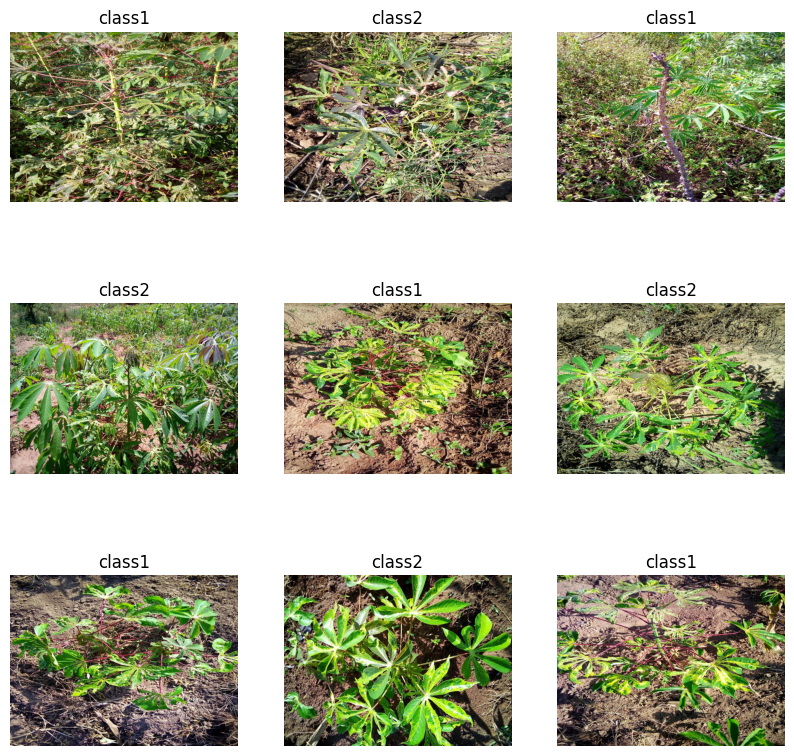

In [42]:
# Menampilkan 9 gambar daun cassava
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Menentukan indeks gambar yang akan ditampilkan
start_index = 0

for i in range(3):
    for j in range(3):
        index = start_index + i*3 + j  # Menghitung indeks gambar
        img_path = os.path.join(data_dir, df['filename'][index])  # Path gambar
        image = imread(img_path)  # Baca gambar
        axes[i, j].imshow(image)  # Menampilkan gambar
        axes[i, j].axis('off')  # Hilangkan sumbu x dan y
        axes[i, j].set_title(df['class'][index])  # Tampilkan label kelas sebagai judul

plt.show()


Grafik

Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 0.0844 - accuracy: 0.9875 - val_loss: 0.1642 - val_accuracy: 0.9000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9000
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9000
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2098 - val_accuracy: 0.9000
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1735 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4424 - val_accuracy: 0.9000
Epoch 8/10
3/3 [=========================

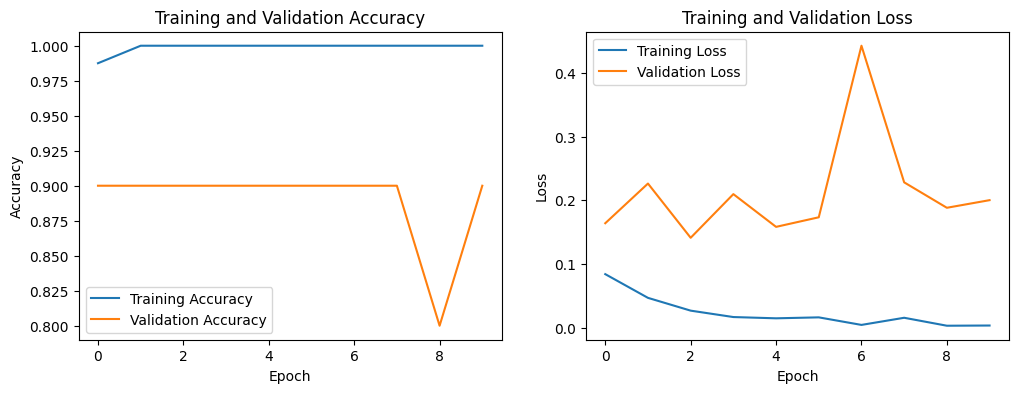

In [49]:
from keras.utils import to_categorical

# Convert class labels to one-hot encoding
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)


# Train CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
